Import module and sub modules 

In [1]:
import numpy as np
import autograd 

#import blocks for trig functions
import autograd.blocks.trigo as trig

#import blocks for exp function
import autograd.blocks.expo as expo

#import variable objects
import autograd.variable as av 

Example 1: `f(x) = sin(x) + cos(x)` for x = 0

In [2]:
#Set the x variable
x = av.Variable(0)

In [3]:
#perform first operation

#instantiate the sin block 
sin = trig.sin()

#pass the value through the sin block
b1 = sin(x)

#if you are only going to perform this function once, 
#you can combind the two operation 
#b1 = trig.sin()(x)

In [4]:
#perform the second operation
b2 = trig.cos()(x)

In [5]:
#perform the final operation 
b3 = b1 + b2

In [6]:
#return data 
print(b3.data)

[ 1.]


In [7]:
#return gradient 
print(b3.gradient)

[[ 1.]]


Create a function to compute the derivative across a range of values

In [8]:
#instantiate blocks outside of function
sin = trig.sin()
cos = trig.cos()
def function(x):
    x1 = av.Variable(x)
    b1 = sin(x1)
    b2 = cos(x1)
    b3 = b1 + b2
    return(b3.data,b3.gradient)

In [9]:
value = list()
data = list()
gradient = list()
for i in np.linspace(-2 * np.pi, 2 * np.pi):
    value.append(i)
    output = function(i)
    data.append(output[0])
    gradient.append(output[1][0])

Let's plot the values

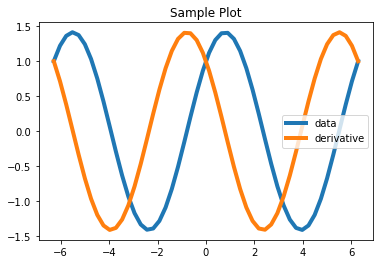

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('lines', linewidth=4, color='g')
plt.plot(value,data,label='data')
plt.plot(value,gradient,label='derivative')
plt.title("Sample Plot")
plt.legend()
plt.show()

Example 2: Create a function to evaluate at multiple values
`f(x) = sin(x + 3)*cos(x/2) + e^-x`

In [12]:
sin = trig.sin()
cos = trig.cos()
exp = expo.exp()
def function(x):
    x1=av.Variable(x)
    #elementary operations such as + - / * 
    #can be performed within other blocks
    b1 = sin(x1 + 3)
    b2 = x1 / 2
    b3 = cos(b2)
    b4 = b1/b3
    b5 = exp(-x1) 
    b7 = b4 + b5
    return(b7.data,b7.gradient)

In [13]:
value = list()
data = list()
gradient = list()
for i in np.linspace(-2 * np.pi, 2 * np.pi):
    value.append(i)
    output = function(i)
    data.append(output[0][0])
    gradient.append(output[1][0])

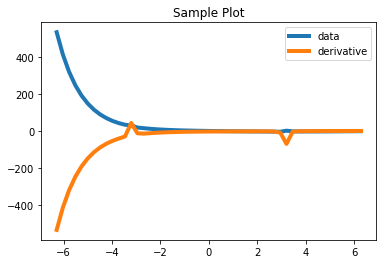

In [14]:
plt.plot(value,data,label='data')
plt.plot(value,gradient,label='derivative')
plt.title("Sample Plot")
plt.legend()
plt.show()